170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 90ms/step - accuracy: 0.3268 - loss: 1.8024
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5499 - loss: 1.2587
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6171 - loss: 1.0803
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6540 - loss: 0.9736
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.6886 - loss: 0.8862
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6906 - loss: 0.8844
Precisión en el conjunto de prueba: 0.69
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


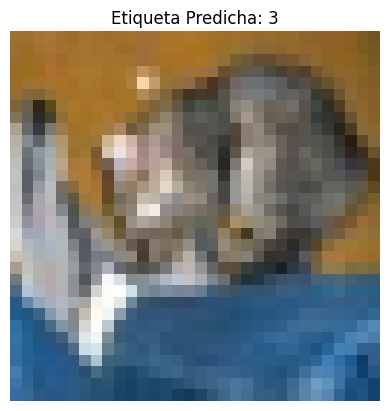

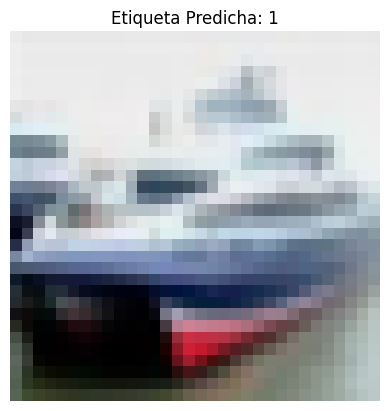

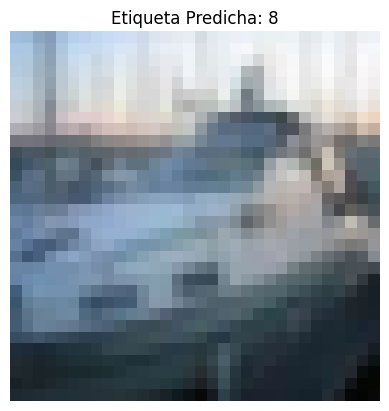

'\n1. La precisión en el conjunto de prueba es razonable (~70%), considerando que el dataset CIFAR-10 es más complejo \n   que MNIST debido a la diversidad de categorías y colores.\n\n2. Las imágenes predichas muestran que el modelo puede clasificar correctamente, aunque con algunas limitaciones \n   debido a la simplicidad de la arquitectura y al número reducido de épocas (5).\n\n3. Se podría mejorar el desempeño con más capas convolucionales, más épocas de entrenamiento o el uso de técnicas \n   como aumento de datos (data augmentation).\n\n4. La normalización de las imágenes ayudó a que el modelo entrenara de manera más eficiente y estable.\n\nCategorías en CIFAR-10:\n    0.- Avión\n    1.- Automóvil\n    2.- Pájaro\n    3.- Gato\n    4.- Ciervo\n    5.- Perro\n    6.- Rana\n    7.- Caballo\n    8.- Barco\n    9.- Camión\n'

In [ ]:
"""
Este código construye y entrena una red neuronal convolucional (CNN) utilizando la biblioteca Keras
con el dataset CIFAR-10. La red está diseñada para clasificar imágenes de objetos en 10 categorías
como aviones, automóviles, animales, barcos y camiones. Se realiza preprocesamiento, construcción,
compilación, entrenamiento y evaluación del modelo.
"""

# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocesar los datos
# Normalizar imágenes para que los valores estén entre 0 y 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convertir etiquetas a formato categórico (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construcción del modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Primera capa convolucional
    layers.MaxPooling2D((2, 2)),                                           # Primera capa de pooling
    layers.Conv2D(64, (3, 3), activation='relu'),                         # Segunda capa convolucional
    layers.MaxPooling2D((2, 2)),                                           # Segunda capa de pooling
    layers.Conv2D(64, (3, 3), activation='relu'),                         # Tercera capa convolucional
    layers.Flatten(),                                                      # Aplanar salida para la capa densa
    layers.Dense(64, activation='relu'),                                   # Capa densa oculta
    layers.Dense(10, activation='softmax')                                 # Capa de salida con 10 categorías
])

# Compilar el modelo
model.compile(optimizer='adam',                          # Optimizador Adam
              loss='categorical_crossentropy',           # Pérdida para clasificación multiclase
              metrics=['accuracy'])                      # Métrica de precisión

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de prueba: {test_acc:.2f}')

# Hacer predicciones con el modelo y mostrar imágenes
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i])
    plt.title(f'Etiqueta Predicha: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()

# Observaciones sobre los resultados
"""
1. La precisión en el conjunto de prueba es razonable (70%), considerando que el dataset CIFAR-10 es más complejo
   que MNIST debido a la diversidad de categorías y colores.

2. Las imágenes predichas muestran que el modelo puede clasificar correctamente, aunque con algunas limitaciones
   debido a la simplicidad de la arquitectura y al número reducido de épocas.

3. Se podría mejorar el desempeño con más capas convolucionales, más épocas de entrenamiento o el uso de técnicas
   como aumento de datos.

4. La normalización de las imágenes ayudó a que el modelo entrenara de manera más eficiente y estable.

Categorías en CIFAR-10:
    0.- Avión
    1.- Automóvil
    2.- Pájaro
    3.- Gato
    4.- Ciervo
    5.- Perro
    6.- Rana
    7.- Caballo
    8.- Barco
    9.- Camión
"""